# Orthorectifying a GOES ABI image with `goes_ortho.ortho()`

Orthorectify and clip a GOES ABI image using an input DEM

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import goes_ortho

We will use the `goes_ortho.ortho()` function to orthorectify and clip a GOES ABI image for an area within lat/lon bounds we'll specify.

First, provide a filepath to the GOES ABI image we want to orthorectify:

In [2]:
goes_image_path = '/storage/GOES/goes17/2020/3/3/ABI-L1b-RadC/00/C02/OR_ABI-L1b-RadC-M6C02_G17_s20200630001176_e20200630003549_c20200630003571.nc'

We can specify a list of the variables in the dataset that we want to include in the orthorectified dataset:

In [3]:
data_vars = ['Rad']

And then we need to provide a new filepath and filename for where to save the final orthorectified dataset:

In [4]:
new_goes_filename = './OR_ABI-L1b-RadC-M6C02_G17_s20200630001176_e20200630003549_c20200630003571_ortho.nc'

Finally, specify the lat/lon bounds for the area we want to orthorectify, like (min lon, min lat, max lon, max lat):

In [5]:
bounds = (-120.0, 36.25, -118.0, 38.25)

Run the function!

In [6]:
goes_ortho.ortho(goes_image_path, data_vars, bounds, new_goes_filename, keep_dem=False)

/home/spestana/opt/anaconda3/envs/goes-linux/bin/gdalwarp -r cubic -co COMPRESS=LZW -co TILED=YES -co BIGTIFF=IF_SAFER -tr 30 30 -t_srs '+proj=lonlat +datum=GRS80' temp_SRTMGL3_DEM.tif temp_SRTMGL3_DEM_proj.tif
/home/spestana/opt/anaconda3/envs/goes-linux/bin/gdalwarp -r cubic -co COMPRESS=LZW -co TILED=YES -co BIGTIFF=IF_SAFER -tr 30 30 -t_srs '+proj=lonlat +datum=GRS80' temp_SRTMGL3_DEM.tif temp_SRTMGL3_DEM_proj.tif

RUNNING: make_ortho_map()

Opening GOES ABI image...


Child returned 1



Get inputs: projection information from the ABI radiance product
...done

Opening DEM file...

Create 2D arrays of longitude and latitude from the DEM
...done

For each grid cell in the DEM, compute the corresponding ABI scan angle (x and y, radians)
...done

Create metadata dictionary about this map
...done

Create pixel map dataset
<xarray.Dataset>
Dimensions:         (latitude: 2400, longitude: 2400)
Coordinates:
  * longitude       (longitude) float64 -120.0 -120.0 -120.0 ... -118.0 -118.0
  * latitude        (latitude) float64 38.25 38.25 38.25 ... 36.25 36.25 36.25
    dem_px_angle_x  (latitude, longitude) float64 0.03902 0.03902 ... 0.04471
    dem_px_angle_y  (latitude, longitude) float64 0.1047 0.1047 ... 0.1003
Data variables:
    elevation       (latitude, longitude) float64 1.777e+03 ... 1.155e+03
Attributes:
    longitude_of_projection_origin:       -137.0
    semi_major_axis:                      6378137.0
    semi_minor_axis:                      6356752.31414
    satel

Open the new file we created, and plot it:

In [7]:
ds = xr.open_dataset(new_goes_filename)

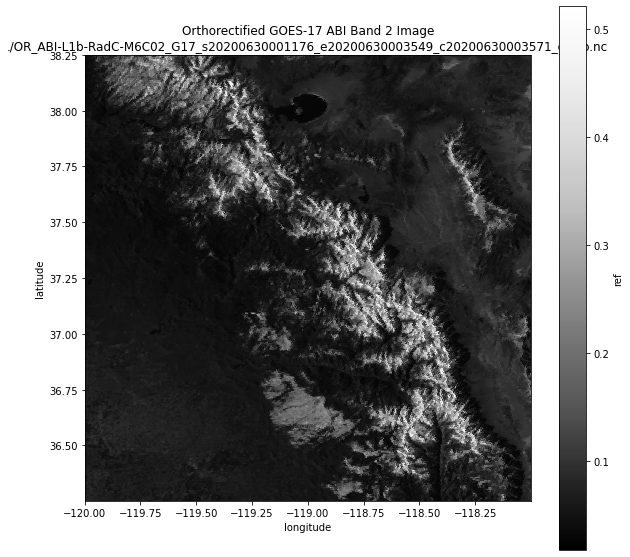

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_aspect(1)
ds.ref.plot(ax=ax, cmap='Greys_r')
ax.set_title('Orthorectified GOES-17 ABI Band 2 Image\n{}'.format(new_goes_filename));